In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

import olac

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.facecolor'] = 'white'

In [3]:
base_center = (0,0,)
base_var = 5
n_points = 1500
n_satellites = 120
satellite_var = 1
satellite_pos_var = 0.6
contamination = 0.1

In [4]:
np.random.seed(1)
for p in olac.utils.slide_probability_over_list(6, 3, 1, 0.1):
    print(np.random.choice([1,2,3], p=p))
    

1
2
3
1
2
3


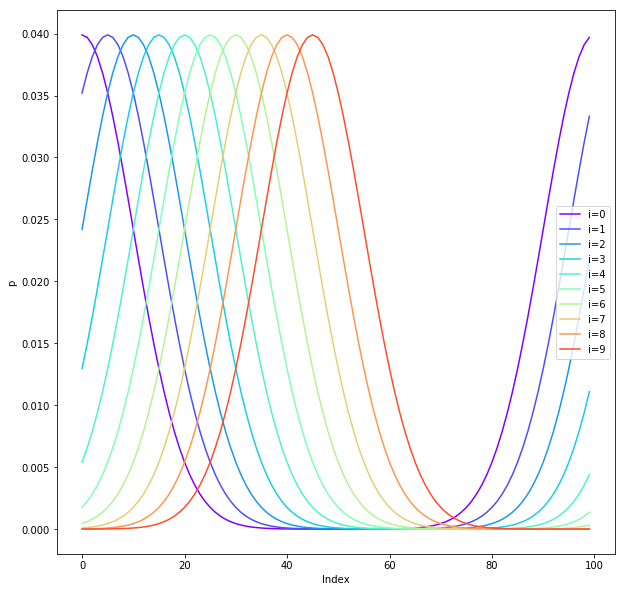

In [5]:
cm = plt.cm.get_cmap('rainbow')
n=10
for i, p in enumerate(olac.utils.slide_probability_over_list(n, 100, 5, 10)):
    plt.plot(p, label=f'i={i}', color=cm(i/n))
plt.legend()
plt.xlabel('Index')
plt.ylabel('p');

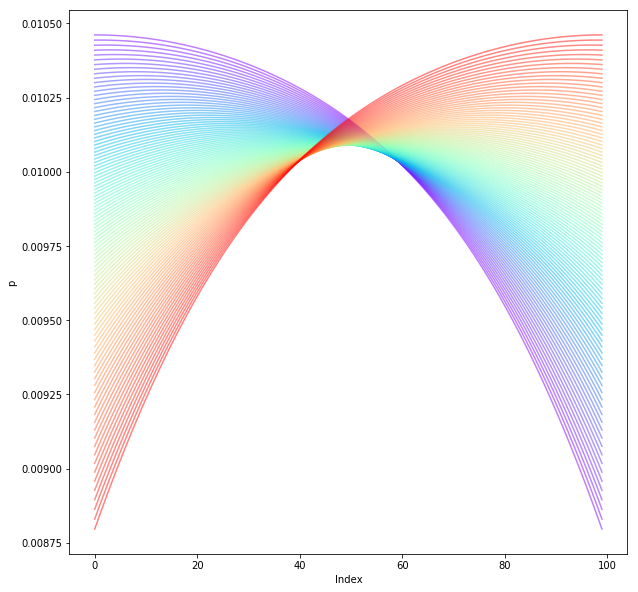

In [6]:
cm = plt.cm.get_cmap('rainbow')
n=100
for i, p in enumerate(olac.utils.slide_probability_over_list(n, 100, 1, 60)):
    plt.plot(p, label=f'i={i}', color=cm(i/n), alpha=0.5)
# plt.legend()
plt.xlabel('Index')
plt.ylabel('p');

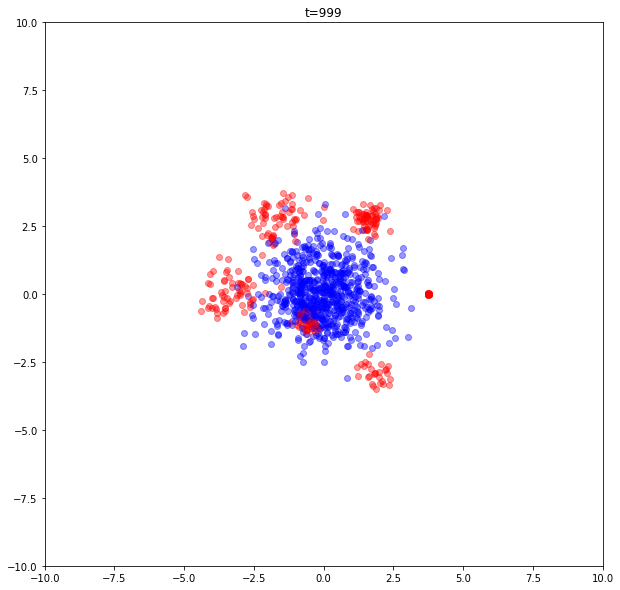

In [37]:
x_sat = olac.data_generators.satellites(
    n_points=1000,
    n_satellites=6,
    contamination=0.3,
    satellite_radius=3,
    satellite_radius_std=0.3,
    satellite_std_std=0.7,
    satellite_progress_rate=0.01,
    satellite_simul=0.1,
    
)

from IPython import display

colors = ['b','r']

for t, x in enumerate(x_sat):
    plt.scatter(*x[:2], color=colors[int(x[-1])], alpha=0.4)
    plt.title(f't={t}')
    plt.xlim([-10,10])
    plt.ylim([-10,10])
    if t%100==0:
        display.clear_output(wait=True)
        display.display(plt.gcf())

display.clear_output()

# ax = x_df[x_df['label']==0].plot.scatter('x1','x2', c='b', alpha=0.5)
# ax = x_df[x_df['label']==1].plot.scatter('x1','x2', c='r', alpha=1, ax=ax)